# Training a Softmax Linear Classifier

This is the linear classifier example from section Neural Networks case-study.


In [94]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from __future__ import print_function

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


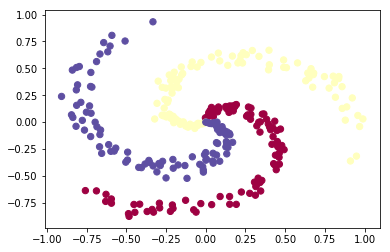

Train data shape:  (300, 2)
Train labels shape:  (300,)


In [105]:
def generate_spiral_dataset(N=100, D=2, K=3):
    """
    Generate a classification dataset X, y, spiral dataset (not linearly separable).
    N: number of points per class
    D: dimensionality
    K: number of classes
    """
    X = np.zeros((N*K,D))                                             # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8')                                  # class labels
    for j in range(K):
        ix = range(N*j,N*(j+1))
        r = np.linspace(0.0,1,N)                                      # radius
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2       # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j

    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)    # lets visualize the data
    plt.show()
    
    return X, y
    
    
X, y = generate_spiral_dataset()
print('Train data shape: ', X.shape)
print('Train labels shape: ', y.shape)

## Initialization

In [106]:
D = 2                                                             # Dimensions in X,   X(N, D)
K = 3                                                             # number of classes in y
W = 0.01 * np.random.randn(D,K)                                   # initialize parameters randomly, W(D, K)
b = np.zeros((1,K))                                               # initialize bias to zero

## Hyperparameters

In [107]:
step_size = 1e-0
reg = 1e-3                                                        # regularization strength lambda

## Gradient Descent loop

In [108]:
N = X.shape[0]
for i in range(200):                                              # Python3 has no xrange()

    #-------------------------------------------------------
    # Class scores
    #-------------------------------------------------------
    scores = np.dot(X, W) + b                                     # compute class scores for a linear classifier, [N x K]

    #-------------------------------------------------------
    # Class probabilities (Softmax)
    #-------------------------------------------------------
    exp_scores = np.exp(scores)
    P = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)    # P: Softmax output

    #-------------------------------------------------------
    # Loss and regularization
    #-------------------------------------------------------
    CE = -np.log(P[range(N), y])                                  # Cross-entropy (negative log probabilities of the Softmax)
    data_loss = np.sum(CE) / N                                    # Average cross-entropy
    reg_loss = 0.5 * reg * np.sum(W*W)                            # 0.5 is a trick that simplifies the derivative of the regularization:
                                                                  # dreg_loss/dW = reg * np.sum(W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print('iteration %d: loss %f' % (i, loss))

    #-------------------------------------------------------
    # Checkpoint: Look for correct initial loss
    #-------------------------------------------------------
    # calculated initial loss = 1.1
    # Initial loss expected = -np.log(1.0 / K) 
    #                       = -np.log(1.0 / 3)
    #                       = 1.1
    if i == 0:
        print('Checkpoint: initial data loss (should be 1.1): %f' % (data_loss))

    #-------------------------------------------------------
    # Computing the derivative dloss/dscores
    # (shorther implementation than mine in softmax.py)
    #-------------------------------------------------------
    dscores = P                                                  
    dscores[range(N),y] -= 1
    dscores /= N

    #-------------------------------------------------------
    # Backpropagate dscores/dW and dscores/db
    #-------------------------------------------------------
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)

    #-------------------------------------------------------
    # Derivative of the regularization
    #-------------------------------------------------------
    dW += reg * W

    #-------------------------------------------------------
    # Perform a parameter update
    #-------------------------------------------------------
    W += -step_size * dW
    b += -step_size * db
    

iteration 0: loss 1.097722
Checkpoint: initial data loss (should be 1.1): 1.097722
iteration 10: loss 0.900249
iteration 20: loss 0.826532
iteration 30: loss 0.792577
iteration 40: loss 0.774586
iteration 50: loss 0.764140
iteration 60: loss 0.757684
iteration 70: loss 0.753512
iteration 80: loss 0.750724
iteration 90: loss 0.748815
iteration 100: loss 0.747480
iteration 110: loss 0.746533
iteration 120: loss 0.745852
iteration 130: loss 0.745358
iteration 140: loss 0.744995
iteration 150: loss 0.744728
iteration 160: loss 0.744530
iteration 170: loss 0.744382
iteration 180: loss 0.744272
iteration 190: loss 0.744188


## Evaluate training set accuracy
Making a prediction on the training data in X, with the final parameters W and b


In [112]:
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.56


## Plot the learned decision boundaries

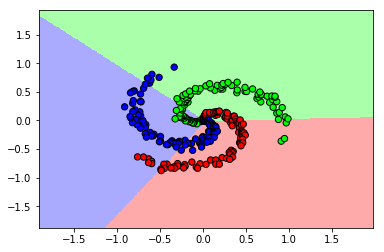

In [111]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1        # creating a new dataset from X as basis for meshgrid()
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1        # the +/- 1 scales the data points in the plot

h = .01                                                    # step size in the mesh (sharpness of the boundaries)

# Create color maps. Requires: from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),           # To plot Desicion boundaries need to make a meshgrid.
                     np.arange(y_min, y_max, h))

XX = np.c_[xx.ravel(), yy.ravel()]                         # XX is the new dataset for the decision plots

# Run a prediction for XX
scores = np.dot(XX, W) + b
predicted_class = np.argmax(scores, axis=1)

# Put the prediction result for XX into a color plot
predicted_class = predicted_class.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, predicted_class, cmap=cmap_light)

# Plot also the training points X
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolors='black', cmap=cmap_bold) # s is the dot size; edgecolor for dots
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()


